In [3]:
from PIL import Image, ImageOps
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os, shutil
import time
import scipy
from scipy import ndimage
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
from keras import models
from keras import layers
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix


# Now lets try and to make the results better

In [9]:
# Create a data generator
datagen2 = ImageDataGenerator(
    rescale=1./255, # normalize pixel values
    rotation_range=20, # randomly rotate images in the range
    zoom_range=0.2, # randomly zoom image 
    width_shift_range=0.2, # randomly shift images horizontally
    height_shift_range=0.2, # randomly shift images vertically 
    brightness_range=[0.8,1.2],  # slight changes in brightness
    
)


In [10]:
# Use flow_from_directory to read images from folders
train_generator2 = datagen2.flow_from_directory(
        'CellData/chest_xray/train', # point to the parent directory
        target_size=(299, 299), # resize images to 299x299
        batch_size=32,
        class_mode='binary') # binary for two classes

# Similarly create validation and test generators
val_generator2 = datagen2.flow_from_directory(
        'CellData/chest_xray/val',
        target_size=(299, 299),
        batch_size=32,
        class_mode='binary')

test_generator2 = datagen2.flow_from_directory(
        'CellData/chest_xray/test',
        target_size=(299, 299),
        batch_size=32,
        class_mode='binary',
        shuffle=False)


Found 4098 images belonging to 2 classes.
Found 879 images belonging to 2 classes.
Found 879 images belonging to 2 classes.


In [11]:
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (5, 5), activation='relu',
                        input_shape=(299 , 299,  3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (4, 4), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [12]:
from collections import Counter
import numpy as np

# Get class distribution
counter = Counter(train_generator2.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}                     

print(counter)
print(max_val)
print(class_weights)

Counter({1: 2991, 0: 1107})
2991.0
{0: 2.7018970189701896, 1: 1.0}


In [13]:
epochs = 150

steps_per_epoch2 = np.ceil(train_generator2.samples / train_generator2.batch_size)
validation_steps2 = np.ceil(val_generator2.samples / val_generator2.batch_size)

history = model2.fit(
    train_generator2,
    steps_per_epoch=int(steps_per_epoch2),
    epochs=epochs,
    validation_data=val_generator2,
    validation_steps=int(validation_steps2),
    class_weight=class_weights)



Epoch 1/150


2023-07-14 19:26:30.799084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


129/129 [==============================] - ETA: 0s - loss: 0.8948 - acc: 0.6747

2023-07-14 19:27:34.257540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


129/129 [==============================] - 76s 582ms/step - loss: 0.8948 - acc: 0.6747 - val_loss: 0.6008 - val_acc: 0.7042
Epoch 2/150
129/129 [==============================] - 72s 557ms/step - loss: 0.6851 - acc: 0.7731 - val_loss: 0.3610 - val_acc: 0.8453
Epoch 3/150
129/129 [==============================] - 76s 584ms/step - loss: 0.6285 - acc: 0.8116 - val_loss: 0.3758 - val_acc: 0.8271
Epoch 4/150
129/129 [==============================] - 73s 559ms/step - loss: 0.6052 - acc: 0.8094 - val_loss: 0.3351 - val_acc: 0.8612
Epoch 5/150
129/129 [==============================] - 74s 572ms/step - loss: 0.5153 - acc: 0.8436 - val_loss: 0.2529 - val_acc: 0.8999
Epoch 6/150
129/129 [==============================] - 73s 564ms/step - loss: 0.5209 - acc: 0.8502 - val_loss: 0.3239 - val_acc: 0.8555
Epoch 7/150
129/129 [==============================] - 86s 665ms/step - loss: 0.4441 - acc: 0.8697 - val_loss: 0.2930 - val_acc: 0.8805
Epoch 8/150
129/129 [==============================] - 77s 5

Epoch 61/150
129/129 [==============================] - 74s 573ms/step - loss: 0.2288 - acc: 0.9427 - val_loss: 0.1924 - val_acc: 0.9261
Epoch 62/150
129/129 [==============================] - 75s 578ms/step - loss: 0.2134 - acc: 0.9395 - val_loss: 0.2125 - val_acc: 0.9306
Epoch 63/150
129/129 [==============================] - 75s 575ms/step - loss: 0.2219 - acc: 0.9375 - val_loss: 0.1470 - val_acc: 0.9374
Epoch 64/150
129/129 [==============================] - 78s 600ms/step - loss: 0.2208 - acc: 0.9407 - val_loss: 0.1669 - val_acc: 0.9397
Epoch 65/150
129/129 [==============================] - 74s 568ms/step - loss: 0.2077 - acc: 0.9441 - val_loss: 0.1229 - val_acc: 0.9579
Epoch 66/150
129/129 [==============================] - 73s 567ms/step - loss: 0.2219 - acc: 0.9383 - val_loss: 0.1617 - val_acc: 0.9465
Epoch 67/150
129/129 [==============================] - 72s 551ms/step - loss: 0.2231 - acc: 0.9427 - val_loss: 0.1819 - val_acc: 0.9317
Epoch 68/150
129/129 [===================

129/129 [==============================] - 73s 565ms/step - loss: 0.1745 - acc: 0.9512 - val_loss: 0.1228 - val_acc: 0.9522
Epoch 121/150
129/129 [==============================] - 73s 564ms/step - loss: 0.1693 - acc: 0.9539 - val_loss: 0.1260 - val_acc: 0.9556
Epoch 122/150
129/129 [==============================] - 73s 560ms/step - loss: 0.1818 - acc: 0.9534 - val_loss: 0.1229 - val_acc: 0.9590
Epoch 123/150
129/129 [==============================] - 73s 563ms/step - loss: 0.1643 - acc: 0.9573 - val_loss: 0.1093 - val_acc: 0.9590
Epoch 124/150
129/129 [==============================] - 73s 565ms/step - loss: 0.1849 - acc: 0.9524 - val_loss: 0.1682 - val_acc: 0.9465
Epoch 125/150
129/129 [==============================] - 72s 557ms/step - loss: 0.1778 - acc: 0.9519 - val_loss: 0.1357 - val_acc: 0.9465
Epoch 126/150
129/129 [==============================] - 78s 602ms/step - loss: 0.1641 - acc: 0.9561 - val_loss: 0.1278 - val_acc: 0.9499
Epoch 127/150
129/129 [=========================

In [14]:
results_train = model2.evaluate(train_generator2)
results_test = model2.evaluate(val_generator2)
print('Training set performance:', results_train)
print('Validation set performance:', results_test)

28/28 [==============================] - 14s 487ms/step - loss: 0.1285 - acc: 0.9522
Training set performance: [0.11073564738035202, 0.9585163593292236]
Validation set performance: [0.12851910293102264, 0.9522184729576111]


In [15]:
results_train = model2.evaluate(train_generator2)
results_test = model2.evaluate(val_generator2)
print('Training set performance:', results_train)
print('Validation set performance:', results_test)

28/28 [==============================] - 13s 448ms/step - loss: 0.1243 - acc: 0.9556
Training set performance: [0.10563354194164276, 0.9607125520706177]
Validation set performance: [0.12427622079849243, 0.9556314945220947]


In [16]:
model2.save('modelnewpostproject.h5')  # creates a HDF5 file 'my_model.h5'

In [17]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 295, 295, 64)      4864      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 147, 147, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 144, 144, 64)      65600     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 72, 72, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 70, 70, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 35, 35, 128)     

In [18]:

# Generate predictions
y_pred = model2.predict(test_generator2)

2023-07-14 22:34:53.934887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 13s 449ms/step


In [19]:
y_pred = (y_pred > 0.5).astype(int)
y_true = test_generator2.classes

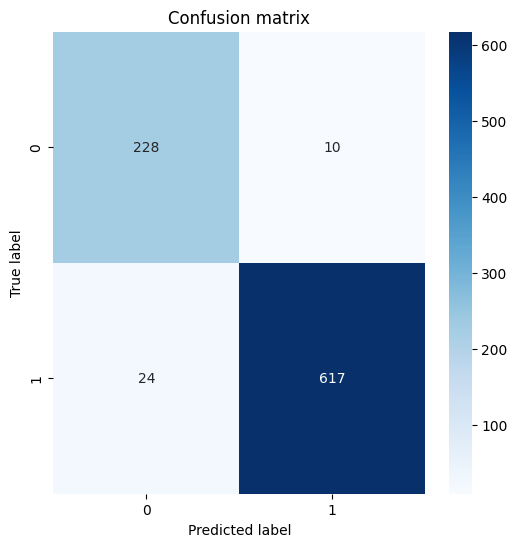

In [20]:

cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [21]:
from sklearn.metrics import classification_report


# Convert continuous values to binary
y_pred_binary = [1 if p>=0.5 else 0 for p in y_pred]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()

specificity = tn / (tn+fp)
print("Specificity: ", specificity)



print(classification_report(y_true, y_pred_binary, target_names=test_generator2.class_indices.keys()))


Specificity:  0.957983193277311
              precision    recall  f1-score   support

      NORMAL       0.90      0.96      0.93       238
   PNEUMONIA       0.98      0.96      0.97       641

    accuracy                           0.96       879
   macro avg       0.94      0.96      0.95       879
weighted avg       0.96      0.96      0.96       879



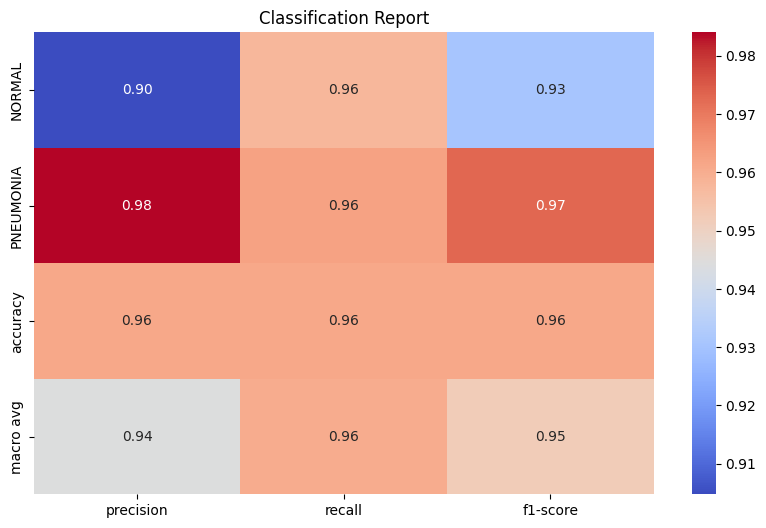

In [22]:

# Convert probabilities into binary outputs
y_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred]

# Then use these binary predictions to compute the classification report
report = classification_report(y_true, y_pred_binary, target_names=test_generator2.class_indices.keys(), output_dict=True)

# Convert the report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6)) 
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Classification Report")
plt.show()


28/28 [==============================] - 12s 433ms/step
AUC:  0.9897612711231139


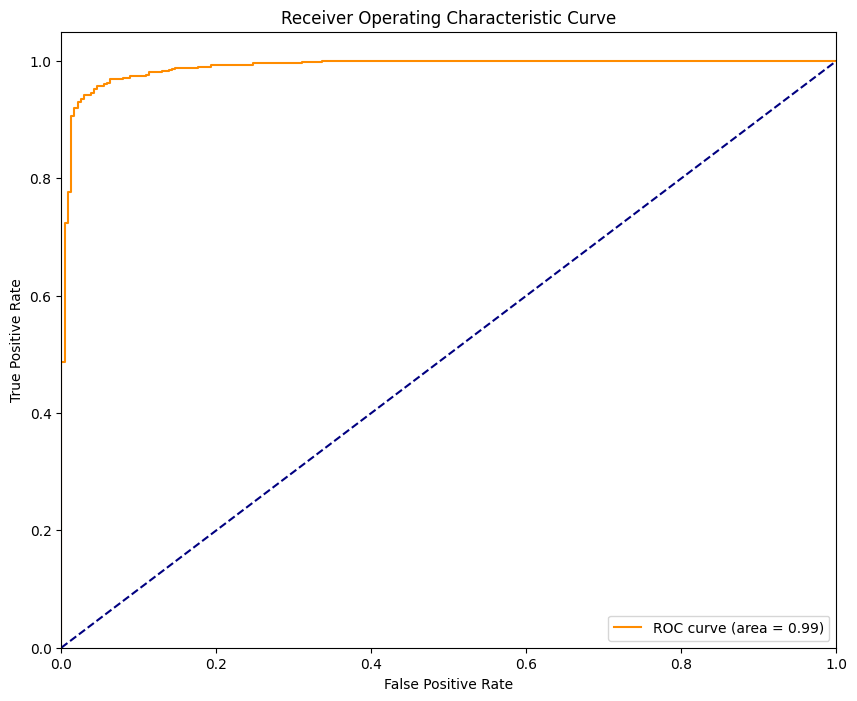

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming val_generator2 is your validation generator
test_generator2.reset()

# Generate predictions
y_pred_probs = model2.predict(test_generator2)

# Get true labels
y_true = test_generator2.classes

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

# Compute AUC
auc = roc_auc_score(y_true, y_pred_probs)
print("AUC: ", auc)
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


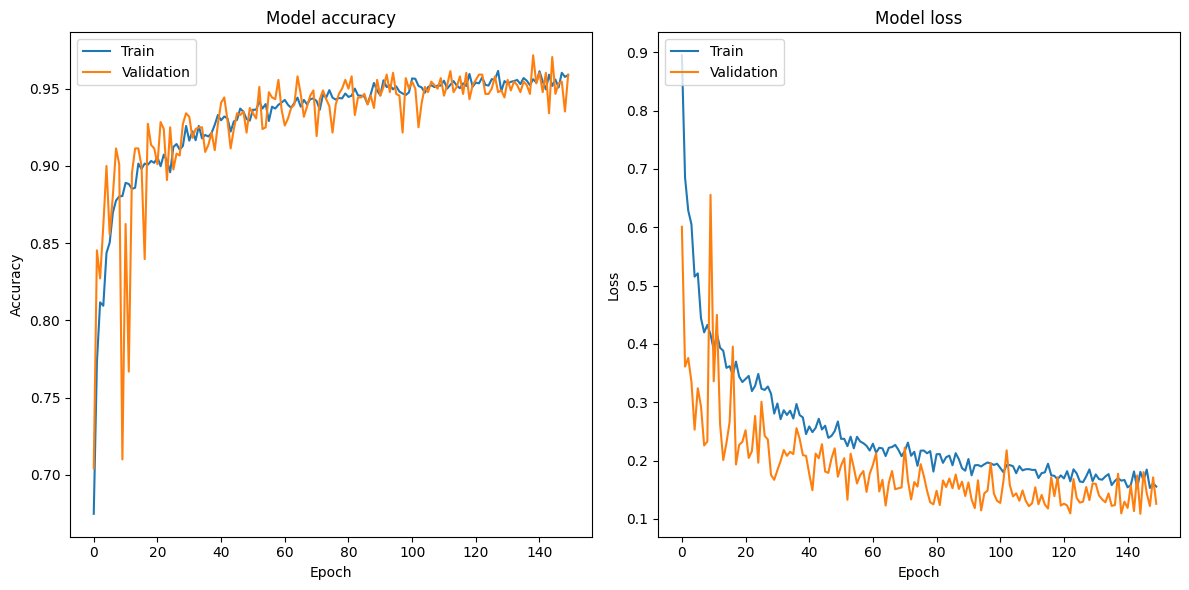

In [24]:


# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [25]:
from tensorflow.keras.preprocessing import image



# Load the image
img = image.load_img('CellData/chest_xray/train/PNEUMONIA/BACTERIA-9074730-0001.jpeg', target_size=(299, 299))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_preprocessed = img_array/255.


In [26]:
predictions = model2.predict(img_preprocessed)


2023-07-14 22:35:22.080264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 479ms/step


In [27]:
if predictions[0] > 0.5:
    print('The model predicts this image is of a PNEUMONIA case.')
else:
    print('The model predicts this image is of a NORMAL case.')


The model predicts this image is of a PNEUMONIA case.


NameError: name 'y_test' is not defined